# Questão 1
---

A equação do movimento de um pêndulo é descrito pela seguinte equação diferencial:
$$ \frac{d^2θ}{dt^2} + \frac{g}{l}sen(θ) = 0 $$

***g*** => aceleração da gravidade;

***l*** => comprimento do pêndulo.

***O objetivo é investigar implementações computacionais que determinam ou aproximam a solução.***

---

## Bibliotecas
---

In [19]:
import numpy as np
import matplotlib.pyplot as plt

## Pendulo

- **Parâmetros do pêndulo**

    - **g** => Aceleração de gravidade (m/s^2)

    - **l** => Comprimento do pêndulo (m)

    - **theta_0** => Ângulo inicial em radianos

    - **omega_0** => Velocidade angular inicial

In [20]:
# Definindo os parâmetros
g = 9.8
l = 1.0
theta_0 = np.radians(30.0)
omega_0 = 0.0

In [21]:
# Função que define a equação diferencial do pêndulo
def pendulo(t, state):
    theta, omega = state
    dtheta_dt = omega
    domega_dt = - (g / l) * np.sin(theta)
    return [dtheta_dt, domega_dt]

## Método de Euler

- Método simples e direto para resolver equações diferenciais ordinárias.

- A ideia básica é aproximar a derivada pela taxa de variação.

- Pode ser usado para resolver numericamente equações diferenciais de segunda ordem convertendo-as em um sistema de duas equações de primeira ordem.

---

In [22]:
# Método de Euler
def euler_method(h, T):
    num_steps = int(T / h)
    time_points = np.linspace(0, T, num_steps + 1)
    theta_values = np.zeros(num_steps + 1)
    omega_values = np.zeros(num_steps + 1)

    # Condições iniciais
    theta_values[0] = theta_0
    omega_values[0] = omega_0

    for i in range(num_steps):
        state = [theta_values[i], omega_values[i]]
        derivatives = pendulo(time_points[i], state)
        theta_values[i + 1] = theta_values[i] + h * derivatives[0]
        omega_values[i + 1] = omega_values[i] + h * derivatives[1]

    return time_points, theta_values

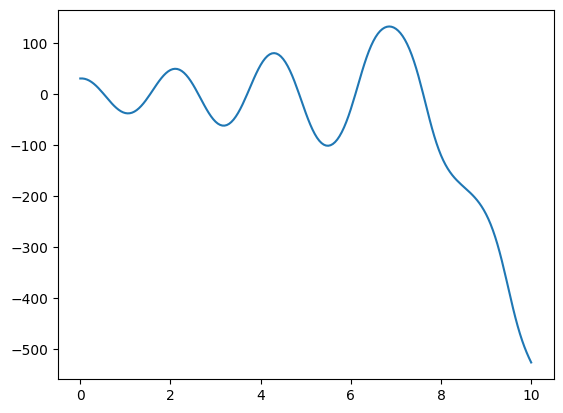

In [23]:
# Gráfico para o Método de Euler
time_euler, theta_euler = euler_method(0.05, 10.0)
plt.plot(time_euler, np.degrees(theta_euler), label='Euler Method');

Nota-se que o método de Euler tende a divergir (piorar) da solução real ao longo do tempo, em especial, para grandes amplitudes.

## Método de Runge-Kutta

- O método de Runge-Kutta é uma família de métodos iterativos mais precisos que o Método de Euler.

- O método de Runge-Kutta de quarta ordem (RK4) é conhecido e utilizado por sua boa precisão e estabilidade.

---

In [24]:
# Método de Runge-Kutta de quarta ordem (RK4)
def runge_kutta_method(h, T):
    num_steps = int(T / h)
    time_points = np.linspace(0, T, num_steps + 1)
    theta_values = np.zeros(num_steps + 1)
    omega_values = np.zeros(num_steps + 1)

    # Condições iniciais
    theta_values[0] = theta_0
    omega_values[0] = omega_0

    for i in range(num_steps):
        state = [theta_values[i], omega_values[i]]
        k1 = h * np.array(pendulo(time_points[i], state))
        k2 = h * np.array(pendulo(time_points[i] + 0.5 * h, state + 0.5 * k1))
        k3 = h * np.array(pendulo(time_points[i] + 0.5 * h, state + 0.5 * k2))
        k4 = h * np.array(pendulo(time_points[i] + h, state + k3))

        theta_values[i + 1] = theta_values[i] + (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) / 6
        omega_values[i + 1] = omega_values[i] + (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) / 6

    return time_points, theta_values

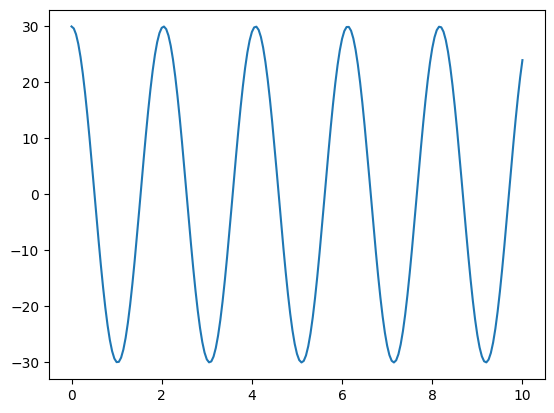

In [25]:
# Gráfico para o Método de Runge-Kutta
time_rk4, theta_rk4 = runge_kutta_method(0.05, 10.0)
plt.plot(time_rk4, np.degrees(theta_rk4), label='Runge-Kutta Method')

O método de Runge-Kutta mostra uma melhoria em relação ao método de Euler.
A solução é mais estável e se aproxima melhor da solução real se comparada ao método de Euler.

## Métodos de Verlet

- Esse método é especialmente útil para problemas de dinâmica molecular, mas pode ser adaptado para resolver equações diferenciais como a do pêndulo.

- **Curiosidade:** Ele é amplamente utilizado em simulações de física molecular.
---

In [26]:
# Método de Verlet
def verlet_method(h, T):
    num_steps = int(T / h)
    time_points = np.linspace(0, T, num_steps + 1)
    theta_values = np.zeros(num_steps + 1)
    omega_values = np.zeros(num_steps + 1)

    # Condições iniciais
    theta_values[0] = theta_0
    omega_values[0] = omega_0

    for i in range(1, num_steps):
        state = np.array([theta_values[i - 1], omega_values[i - 1]])
        a = pendulo(time_points[i], state)
        theta_values[i] = theta_values[i - 1] + h * state[1] + 0.5 * h**2 * a[1]
        state_new = np.array([theta_values[i], 0])
        a_new = pendulo(time_points[i], state_new)
        omega_values[i] = omega_values[i - 1] + 0.5 * h * (a[1] + a_new[1])

    return time_points, theta_values

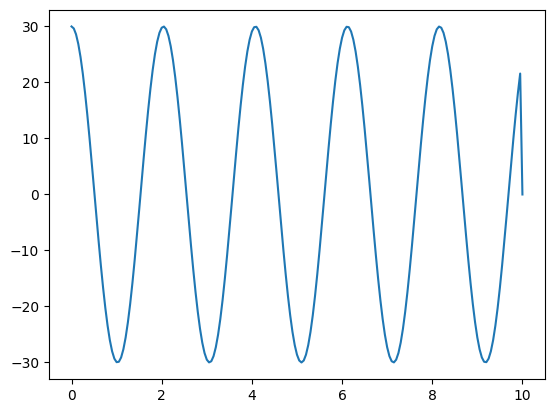

In [27]:
# Gráfico para o Método de Verlet
time_verlet, theta_verlet = verlet_method(0.05, 10.0)
plt.plot(time_verlet, np.degrees(theta_verlet), label='Verlet Method')

O método de Verlet mostra uma boa estabilidade e uma aproximação precisa da solução real.
Este método é particularmente eficaz para problemas de dinâmica molecular.

## Gráfico comparativo entre os métodos
---

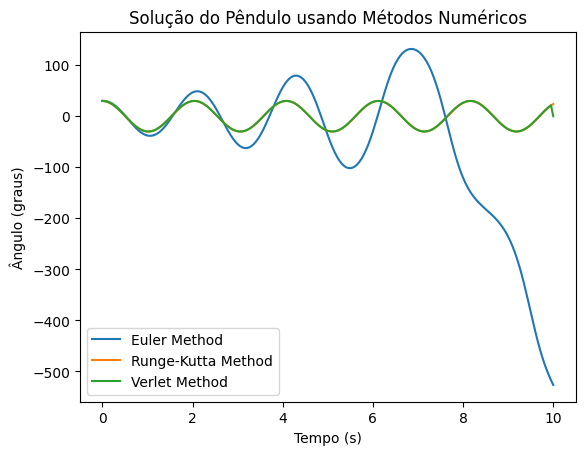

In [34]:
# Gráfico para o Método de Euler
time_euler, theta_euler = euler_method(0.05, 10.0)
plt.plot(time_euler, np.degrees(theta_euler), label='Euler Method')

# Gráfico para o Método de Runge-Kutta
time_rk4, theta_rk4 = runge_kutta_method(0.05, 10.0)
plt.plot(time_rk4, np.degrees(theta_rk4), label='Runge-Kutta Method')

# Gráfico para o Método de Verlet
time_verlet, theta_verlet = verlet_method(0.05, 10.0)
plt.plot(time_verlet, np.degrees(theta_verlet), label='Verlet Method')

plt.title('Solução do Pêndulo usando Métodos Numéricos')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo (graus)')
plt.legend()
plt.show()

## Observações Gerais

- Todos os métodos exibem oscilações amortecidas, características do comportamento de um pêndulo sob a influência da gravidade.

- Ao comparar esses métodos, observa-se que o método de Verlet se destaca ao oferecer uma solução estável e precisa. Em seguida, temos pelo método de Runge-Kutta. O método de Euler, por outro lado, evidencia uma divergência mais distoante em relação à solução real.

---

# Questão 2
---

Uma função é dita de Mathieu se for solução da equação diferencial:
$$ \frac{d^2y}{dx^2} + (a − 2q cos(2x))y = 0 $$

**O objetivo é investigar implementações computacionais que determinam algumas funções de Mathieu.**

---

## Bibliotecas
---

In [29]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Investigação
---

In [30]:
# Definindo a EDO
def mathieu_equation(y, x, a, q):
    dydx = [y[1], (a - 2 * q * np.cos(2 * x)) * y[0]]
    return dydx

In [31]:
# Parâmetros da EDO
a = 2.0
q = 1.0

In [32]:
# Condições iniciais
y0 = [1.0, 0.0]

# Intervalo de x
x = np.linspace(0, 4 * np.pi, 1000)

# Resolução
solution = odeint(mathieu_equation, y0, x, args=(a, q))

A função ***odeint*** é parte do módulo *integrate* da biblioteca *SciPy* em Python e é usada para resolver sistemas de equações diferenciais ordinárias (ODEs). O nome ***odeint*** significa ***ODE integrator***. 

A função é uma implementação de um método de integração de ODEs, que pode ser usado para obter soluções numéricas para sistemas de equações diferenciais ordinárias de primeira ordem.

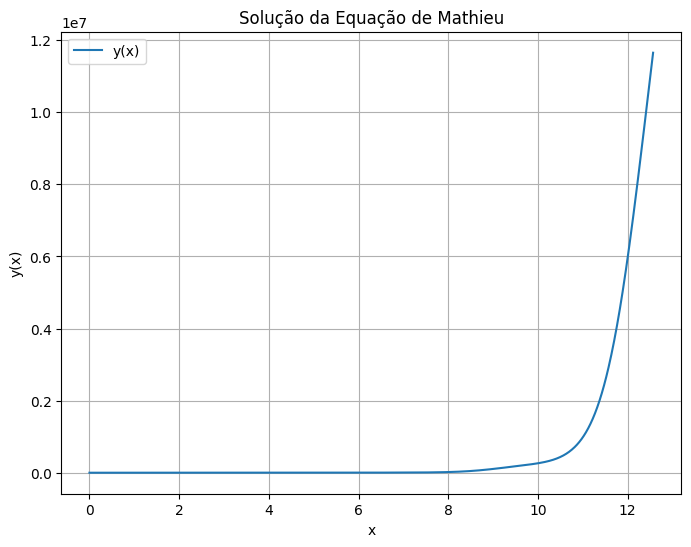

In [33]:
# Plotando a solução
plt.figure(figsize=(8, 6))
plt.plot(x, solution[:, 0], label='y(x)')
plt.title('Solução da Equação de Mathieu')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid(True)
plt.show()

O gráfico representa a solução numérica da equação diferencial de Mathieu para os parâmetros específicos ***a*** e ***q***, dadas as condições iniciais: 

- **y(0)** = 1.0 

- **y′(0)** = 0.0